## Harry Potter Movie Analysis

Alice Ding, Shoshana Farber, Christian Uriostegui

### Overview

Using [this](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset) collection of .csvs on Kaggle that has information from all eight Harry Potter movies, we plan on creating a character relationship network to analyze the strength between these connections by finding how many scenes each character shares with another. We will also be processing the dialogue to extract common themes and sentiment. 

For this project, we will be focusing on the `Dialogue.csv` file for most of this analysis, however we will be pulling information from several of the other files as well as complementary data.

### Importing the Data

To start, we've uploaded the data into our GitHub and will be pulling it in using pandas.

In [14]:
import pandas as pd

dialogue = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Dialogue.csv', encoding = 'ISO-8859-1')
dialogue.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.


From what we can see above, the `Chapter ID`, `Place ID`, and `Character ID` use ints to represent places and characters respectively. For readability, we will replace these IDs with their actual values; these can be found in the `Chapters.csv`, `Places.csv`, and `Characters.csv` files. We'll also be including other data from a few of the other tables as well to create a fuller dataset.

In [15]:
chapters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Chapters.csv', encoding = 'ISO-8859-1')
places = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Places.csv')
characters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Characters.csv', encoding = 'ISO-8859-1')
movies = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Movies.csv')

dialogue = dialogue.merge(chapters, on='Chapter ID', how='left')
dialogue = dialogue.merge(characters, on='Character ID', how='left')
dialogue = dialogue.merge(places, on='Place ID', how='left')
dialogue = dialogue.merge(movies, on='Movie ID', how='left')
dialogue.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter,Character Name,Species,...,Patronus,Wand (Wood),Wand (Core),Place Name,Place Category,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,4 Privet Drive,Dwellings,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1,Minerva McGonagall,Human,...,Cat,Fir,Dragon Heartstring,4 Privet Drive,Dwellings,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,4 Privet Drive,Dwellings,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1,Minerva McGonagall,Human,...,Cat,Fir,Dragon Heartstring,4 Privet Drive,Dwellings,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,4 Privet Drive,Dwellings,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"


We've appended all of the information now -- it looks like a very wide table now though. Let's select the most relevant fields and remove redundant/unnecessary ones.

In [16]:
final_dialogue = dialogue[['Dialogue ID', 'Movie Title', 'Chapter ID', 'Chapter Name', 'Place Name', 'Place Category', 'Character Name', 'House', 'Dialogue']]
final_dialogue = final_dialogue.rename(columns={'Dialogue ID': 'dialogue_id', 
                                                'Movie Title': 'movie_title', 
                                                'Chapter ID': 'chapter_id',
                                                'Chapter Name': 'chapter_name',
                                                'Place Name': 'place_name',
                                                'Place Category': 'place_category', 
                                                'Character Name': 'character_name', 
                                                'House': 'house', 
                                                'Dialogue': 'dialogue'})

final_dialogue.head()

,dialogue_id,movie_title,chapter_id,chapter_name,place_name,place_category,character_name,house,dialogue
0,1,Harry Potter and the Philosopher's Stone,1,Doorstep Delivery,4 Privet Drive,Dwellings,Albus Dumbledore,Gryffindor,I should have known that you would be here...P...
1,2,Harry Potter and the Philosopher's Stone,1,Doorstep Delivery,4 Privet Drive,Dwellings,Minerva McGonagall,Gryffindor,"Good evening, Professor Dumbledore. Are the ru..."
2,3,Harry Potter and the Philosopher's Stone,1,Doorstep Delivery,4 Privet Drive,Dwellings,Albus Dumbledore,Gryffindor,"I'm afraid so, Professor. The good, and the bad."
3,4,Harry Potter and the Philosopher's Stone,1,Doorstep Delivery,4 Privet Drive,Dwellings,Minerva McGonagall,Gryffindor,And the boy?
4,5,Harry Potter and the Philosopher's Stone,1,Doorstep Delivery,4 Privet Drive,Dwellings,Albus Dumbledore,Gryffindor,Hagrid is bringing him.


Our final dataframe is comprised of the following information:

- `dialogue_id`: ID of each line spoken by a character; primary key
- `movie_title`: Movie that this dialogue takes place in
- `chapter_id`: Chapter ID that this dialogue takes place in
- `chapter_name`: Chapter that this dialogue takes place in
- `place_name`: Where the character is located when speaking this dialogue
- `place_category`: Category of the place, can be:
    - Hogwarts
    - Dwellings
    - Other Magical Locations
    - Diagon Alley
    - Hogsmeade
- `character_name`: Character who said this dialogue
- `dialogue`: What the character said

What does this data look like?

### Exploration

How much dialogue happens in each movie?

In [17]:
final_dialogue['movie_title'].value_counts()

Harry Potter and the Order of the Phoenix      1157
Harry Potter and the Half-Blood Prince         1070
Harry Potter and the Deathly Hallows Part 1    1012
Harry Potter and the Chamber of Secrets         986
Harry Potter and the Philosopher's Stone        885
Harry Potter and the Prisoner of Azkaban        881
Harry Potter and the Goblet of Fire             741
Harry Potter and the Deathly Hallows Part 2     712
Name: movie_title, dtype: int64

Order of the Phoenix leads the charge at 1.1k lines of dialogue while Deathly Hallows Part 2 only has 712 -- very interesting range.

What about locations?

In [18]:
final_dialogue['place_category'].value_counts()

Hogwarts                   4504
Dwellings                  1408
Other Magical Locations     953
Diagon Alley                304
Hogsmeade                   275
Name: place_category, dtype: int64

In terms of categories of location, it's not surprising that Hogwarts has the most dialogue in terms of location; a majority of the books occur at the school. 

What do counts look like by character?

In [19]:
final_dialogue['character_name'].value_counts().head()

Harry Potter        1922
Ron Weasley          865
Hermione Granger     848
Albus Dumbledore     474
Rubeus Hagrid        228
Name: character_name, dtype: int64

For the top 5 characters, these aren't too surprising -- Harry having more than double the amount of lines as the next highest (Ron) is more extreme than we would've thought, but it otherwise it isn't too surprising. The top three are the main friend group with Dumbledore and Hagrid as close allies, so it makes sense that these characters would have the most dialogue.

Now that we have a sense of the data, we can get into network creation!

### Prepping the Data

We'll be counting a connection as a shared chapter and place between characters and we can use different values for the weights: either the count of scenes shared, or dialogue spoken between characters. For example, the first scene of the first movie is McGonagall and Dumbledore speaking to each other; this would count as one scene together and however much dialogue they shared, that would count as amount of lines spoken to one another.

To do this, we'll have to create a data frame with the following columns:

- `character1`: First character involved in a scene/place combo
- `character2`: Second character involved in a scene/place combo
- `scenes`: Shared scene count
- `dialogue`: Count of lines spoken between these characters

In [20]:
# Step 1: Group by chapter and place to get a list of characters involved in each interaction
by_chapter_place = final_dialogue[['chapter_id', 'place_name', 'character_name', 'dialogue_id']].groupby(['chapter_id', 'place_name', 'character_name']).nunique().reset_index()
by_chapter_place.rename(columns={'dialogue_id': 'dialogue', 'character_name': 'character1'}, inplace=True)

by_chapter_place.head(3)

,chapter_id,place_name,character1,dialogue
0,1,4 Privet Drive,Albus Dumbledore,9
1,1,4 Privet Drive,Minerva McGonagall,5
2,1,4 Privet Drive,Rubeus Hagrid,2


From this, we would want to extract that from the first chapter, Dumbledore, McGonagall and Hagrid are connected with a scene weight of 1 and a dialogue weight of 9, 5, and 2 respectively for each character. To do this, we will first get a combination of chapter, place, and characters in that scene before then merging these two dataframes to get all of the information.

In [21]:
# Step 2: Create a dataframe with all unique combinations of chapter_id, place_name, and characters involved
unique_combinations = pd.DataFrame(final_dialogue[['chapter_id', 'place_name']].drop_duplicates())
unique_combinations['key'] = 1  # use this as a dummy column for merging

unique_combinations.head()

,chapter_id,place_name,key
0,1,4 Privet Drive,1
16,2,4 Privet Drive,1
49,3,4 Privet Drive,1
81,4,Hut-on-the-Rock,1
119,5,The Leaky Cauldron,1


In [22]:
# Step 3: Merge the two dataframes to combine the information
combined_df = pd.merge(unique_combinations, by_chapter_place, on=['chapter_id', 'place_name'], how='left') # merge both dataframes
combined_df = pd.merge(combined_df, by_chapter_place, on=['chapter_id', 'place_name'], how='left')
combined_df = combined_df[combined_df['character1_x'] != combined_df['character1_y']]  # exclude self-combinations
combined_df['scenes'] = combined_df.groupby(['chapter_id', 'place_name'])['character1_x'].transform('count')  # add scenes column
combined_df = combined_df.groupby(['chapter_id', 'place_name', 'character1_x', 'character1_y']).agg({'scenes': 'count', 'dialogue_x': 'sum'}).reset_index()
combined_df.rename(columns={'character1_x': 'character1', 'character1_y': 'character2', 'dialogue_x': 'dialogue'}, inplace=True)
combined_df = combined_df[['character1', 'character2', 'scenes', 'dialogue']]

combined_df.head()

,character1,character2,scenes,dialogue
0,Albus Dumbledore,Minerva McGonagall,1,9
1,Albus Dumbledore,Rubeus Hagrid,1,9
2,Minerva McGonagall,Albus Dumbledore,1,5
3,Minerva McGonagall,Rubeus Hagrid,1,5
4,Rubeus Hagrid,Albus Dumbledore,1,2


Great! Last step is just to aggregate it so we get teh summation of scenes and dialogue for each of the combinations.

In [23]:
final_df = combined_df.groupby(['character1', 'character2']).agg({'scenes': 'sum', 'dialogue': 'sum'}).reset_index()
final_df.head()

,character1,character2,scenes,dialogue
0,Aberforth Dumbledore,Harry Potter,1,18
1,Aberforth Dumbledore,Hermione Granger,1,18
2,Aberforth Dumbledore,Ron Weasley,1,18
3,Alastor Moody,Albus Dumbledore,8,19
4,Alastor Moody,Barty Crouch Jr.,2,12


With this set up, we can now try making the graph!

### Network Creation

We'll start with just looking at the network by scene count.

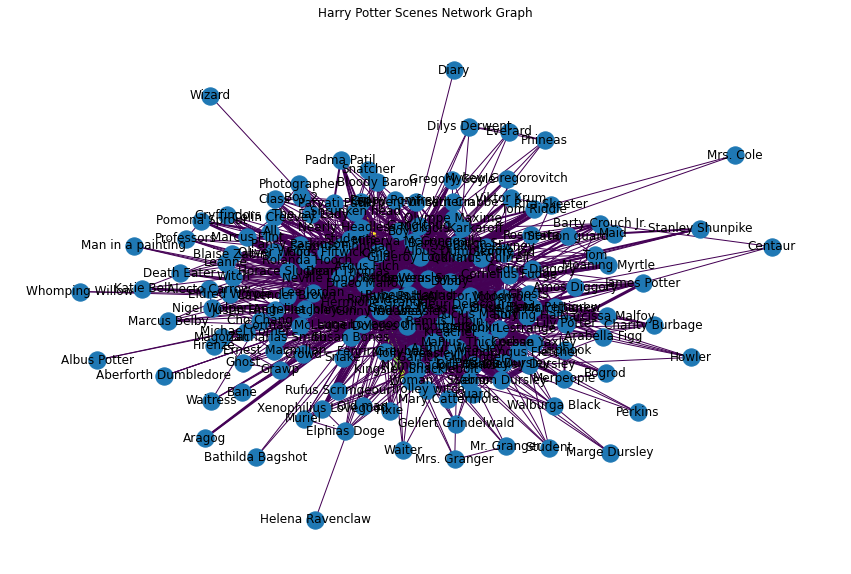

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

np.random.seed(123)

# initialize empty graph object
scene_network = nx.Graph()

# add nodes, edges, and weights
scene_network = nx.from_pandas_edgelist(final_df, 'character1', 'character2', edge_attr=True)

weights = [edata['scenes'] for f, t, edata in scene_network.edges(data = True)]

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(scene_network, seed = 11)
nx.draw_networkx(scene_network, pos, width = weights, edge_color = weights, with_labels=True)
plt.title("Harry Potter Scenes Network Graph")
plt.axis('off')
plt.show()

Very interesting to look at -- what if we tried using dialogue as weight?

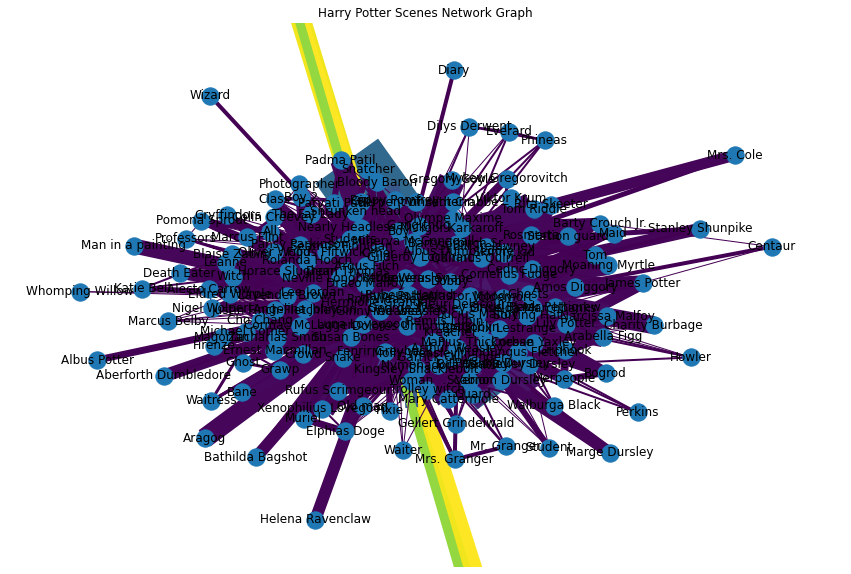

In [25]:
weights = [edata['dialogue'] for f, t, edata in scene_network.edges(data = True)]

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(scene_network, seed = 11)
nx.draw_networkx(scene_network, pos, width = weights, edge_color = weights, with_labels=True)
plt.title("Harry Potter Scenes Network Graph")
plt.axis('off')
plt.show()

Definitely a lot more going on -- let's try to clean these graphs up!

### Network Analysis